# **Patient Segmentation** #

# **Import Library**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Memuat Dataset**

In [7]:
path = "/content/drive/MyDrive/AVD Dataset Praktikum/patient_segmentation_dataset.csv"
df = pd.read_csv(path)

df

,PatientID,Age,Gender,State,City,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag
0,P10000,64,Male,GA,Unknown,151,115,50.4,Private,Arthritis,3,7,2995.0,2025-07-18,186,0
1,P10001,59,Male,OH,Unknown,189,68,19.0,Medicare,Depression,1,8,1209.0,2025-12-12,39,0
2,P10002,58,Female,PA,Unknown,156,91,37.4,Private,Asthma,1,4,999.0,2025-09-16,126,0
3,P10003,43,Female,GA,Unknown,152,92,39.8,Medicare,Hypertension,1,6,5638.5,2025-04-09,286,1
4,P10004,53,Female,NC,Unknown,167,51,18.3,Medicaid,Asthma,1,4,5796.0,2025-03-07,319,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,P11995,37,Male,IL,Springfield,195,109,28.7,Medicaid,NaN,0,4,4581.0,2025-09-20,122,1
1996,P11996,32,Female,NY,Rochester,151,94,41.2,Private,NaN,0,1,329.0,2025-08-23,150,1
1997,P11997,50,Female,NC,Unknown,149,115,51.8,Private,Anxiety,1,8,4942.5,2025-05-23,242,1
1998,P11998,74,Female,NC,Unknown,165,97,35.6,Medicare,Heart Disease,3,7,4700.0,2025-07-09,195,1


# **Business Understanding**

Penyedia layanan kesehatan menghadapi tantangan dalam memberikan perawatan yang dipersonalisasi dan melakukan pemasaran kepada beragam populasi pasien. Pendekatan one-size-fits-all (satu solusi untuk semua) terbukti gagal karena menyebabkan pasien tidak patuh pada program pencegahan dan sumber daya terbuang sia-sia.

## **Business Objective**

Menggunakan data untuk melakukan Segmentasi Pasien guna menciptakan strategi pemasaran dan layanan kesehatan yang spesifik untuk setiap kelompok, sehingga meningkatkan kepuasan pasien dan efisiensi biaya. Secara spesifiknya;


1.   Membuat Segmentasi = Memecah 2.000 pasien menjadi 3-5 kelompok yang punya sifat mirip.
2.   Personalisasi Layanan = Memberikan apa yang benar benar dibutuhkan tiap kelompok. seperti untuk orang sehat diajak untuk hidup lebih sehat (gym/suplemen/vitamin), untuk orang sakit diingatkan untuk meminum obat dan melakukan kontrol
3.   Optimasi Sumber Daya = Memastikan intervensi medis dan anggaran pemasaran diarahkan secara tepat sasaran kepada pasien yang paling membutuhkan atau yang memberikan nilai strategis bagi organisasi.



## **Assess Situation**

Organisasi memiliki aset data yang komprehensif, mencakup dimensi demografi (usia, lokasi), klinis (BMI, kondisi kronis), finansial (asuransi, tagihan), dan perilaku (kunjungan terakhir). Data ini dinilai sangat memadai untuk melakukan analisis pola mendalam. Meskipun terdapat beberapa data lokasi yang tidak lengkap, variabel kunci lainnya sudah cukup kuat untuk membentuk dasar pemodelan segmentasi yang akurat.

## **Analytic Goals Project Plan**

Untuk mendukung strategi pemasaran dan manajemen perawatan yang tepat sasaran, tim analitik akan berfokus pada pengolahan data klinis dan perilaku guna mengekstraksi wawasan terkait risiko kesehatan serta potensi loyalitas pasien melalui target-target berikut:


1.   Identifikasi Risiko dan Intervensi: Memetakan pasien berisiko tinggi (kondisi kronis/obesitas) yang jarang berkunjung untuk memicu intervensi dini melalui layanan seperti telemedicine.
2.   Analisis Nilai Jangka Panjang: Mengukur potensi segmen pasien muda dan sehat untuk dirancang strategi retensinya melalui layanan pencegahan dan gaya hidup.
3.   Optimasi Layanan Prioritas: Menganalisis kebutuhan pasien lansia dan pengguna asuransi rutin guna menyelaraskan fasilitas fisik dan kenyamanan operasional yang meningkatkan loyalitas.


Rencana proyek akan dimulai dengan tahap persiapan data untuk menstandarisasi seluruh variabel sehingga dapat dibandingkan secara objektif. Selanjutnya, analis akan menggunakan algoritma cerdas untuk membentuk segmen pasien secara otomatis yang kemudian diterjemahkan menjadi profil persona spesifik. Sebagai langkah akhir, hasil segmentasi tersebut akan diimplementasikan melalui kebijakan layanan dan kampanye pemasaran yang dipersonalisasi, sehingga setiap pasien mendapatkan penawaran yang paling relevan dengan profil risiko dan kebutuhan kesehatan mereka.



## **Struktur Data (Informasi Lanjutan)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2000 non-null   object 
 1   Age                     2000 non-null   int64  
 2   Gender                  2000 non-null   object 
 3   State                   2000 non-null   object 
 4   City                    2000 non-null   object 
 5   Height_cm               2000 non-null   int64  
 6   Weight_kg               2000 non-null   int64  
 7   BMI                     2000 non-null   float64
 8   Insurance_Type          2000 non-null   object 
 9   Primary_Condition       1505 non-null   object 
 10  Num_Chronic_Conditions  2000 non-null   int64  
 11  Annual_Visits           2000 non-null   int64  
 12  Avg_Billing_Amount      2000 non-null   float64
 13  Last_Visit_Date         2000 non-null   object 
 14  Days_Since_Last_Visit   2000 non-null   



1.   PatientID              Jumlah Baris: 2000 Tipe Data: object Deskripsi: ID Pasien
2.   Age                    Jumlah Baris: 2000 Tipe Data: int64 Deskripsi: Umur Pasien  
3.   Gender                 Jumlah Baris: 2000 Tipe Data: object Deskripsi: Jenis Kelamin Pasien
4.   State                  Jumlah Baris: 2000 Tipe Data: object Deskripsi: Pasien Negara bagian mana
5.   City                   Jumlah Baris: 2000 Tipe Data: object Deskripsi: Pasien dari Kota mana
6.   Height_cm              Jumlah Baris: 2000 Tipe Data: int64 Deskripsi:  Tinggi dari pasien
7.   Weight_kg              Jumlah Baris: 2000 Tipe Data: int64 Deskripsi: Berat dari pasien
8.   BMI                    Jumlah Baris: 2000 Tipe Data: float64 Deskripsi: Indeks massa tubuh
9.   Insurance_Type         Jumlah Baris: 2000 Tipe Data: object Deskripsi: Tipe Asuransi Pasien
10.  Primary_Condition      Jumlah Baris: 1505 Tipe Data: object Deskripsi: Kondisi Awal Pasien
11.  Num_Chronic_Conditions Jumlah Baris: 2000 Tipe Data: int64 Deskripsi: Angka Kondisi Kronis Pasien
12.  Annual_Visits          Jumlah Baris: 2000 Tipe Data: int64 Deskripsi: Kunjugan Tahunan
13.  Avg_Billing_Amount     Jumlah Baris 2000 Tipe Data: float64 Deskripsi: Rata-rata jumlah pengeluaran
14.  Last_Visit_Date        Jumlah Baris 2000 Tipe Data: object Deskripsi: Tanggal kunjungan terakhir
15.  Days_Since_Last_Visit  Jumlah Baris 2000 Tipe Data: int64 Deskripsi: Berapa hari setelah kunjungan terakhir
16.  Preventive_Care_Flag   Jumlah Baris 2000 Tipe Data: int64 Deskripsi: Layanan Perawatan Pencegahan



### **Informasi Statistik Deskriptif**

In [ ]:
df.describe(include='all')

,PatientID,Age,Gender,State,City,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag
count,2000,2000.00000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000,1505,2000.000000,2000.000000,2000.000000,2000,2000.000000,2000.000000
unique,2000,NaN,2,10,20,NaN,NaN,NaN,4,9,NaN,NaN,NaN,364,NaN,NaN
top,P11983,NaN,Female,NC,Unknown,NaN,NaN,NaN,Medicare,Hypertension,NaN,NaN,NaN,2025-07-03,NaN,NaN
freq,1,NaN,1001,213,1012,NaN,NaN,NaN,906,210,NaN,NaN,NaN,13,NaN,NaN
mean,NaN,50.69550,NaN,NaN,NaN,167.907500,85.143500,30.740650,NaN,NaN,1.080000,5.466500,4000.270500,NaN,180.085000,0.464000
std,NaN,15.44445,NaN,NaN,NaN,12.684494,20.385428,8.839952,NaN,NaN,0.890504,3.485965,2463.239215,NaN,104.688484,0.498827
min,NaN,18.00000,NaN,NaN,NaN,145.000000,50.000000,13.400000,NaN,NaN,0.000000,1.000000,207.000000,NaN,1.000000,0.000000
25%,NaN,40.00000,NaN,NaN,NaN,158.000000,67.000000,23.800000,NaN,NaN,1.000000,3.000000,2061.000000,NaN,90.000000,0.000000
50%,NaN,51.00000,NaN,NaN,NaN,168.000000,86.000000,30.100000,NaN,NaN,1.000000,4.000000,3707.250000,NaN,183.000000,0.000000
75%,NaN,63.25000,NaN,NaN,NaN,177.000000,103.000000,37.025000,NaN,NaN,1.000000,8.000000,5650.875000,NaN,268.000000,1.000000


1. Count (Kelengkapan Data) Berdasarkan data, total baris transaksi adalah 2000. Maka dapat disimpulkan:

*   Primary_Condition hilang 495 data (2000 - 1505)

Kesimpulan: Kolom Primary_Condition mengandung missing values, sementara kolom lainnya sudah lengkap (2000 data)

---

2.  Mean vs Median (Distribusi Data)


*   Kolom Age
    * Mean = 50.695
    * Median = 51.00
*   Kolom Height_cm
    * Mean = 167.907
    * Median = 168.00
*   Kolom Weight_kg
    * Mean = 85.143
    * Median = 86.00
*   Kolom BMI
    * Mean = 30.740
    * Median = 30.10
*   Kolom Num_Chronic_Condition
    * Mean = 1.080
    * Median = 1.00
*   Kolom Annual_Visits
    * Mean = 5.466
    * Median = 4.00
*   Kolom Average_Billing_Amount
    * Mean = 4000.270
    * Median = 3707.25
*   Kolom Days_Since_Last_Visit
    * Mean = 180.085
    * Median = 183.00
*   Kolom Preventive_Care_Flag
    * Mean = 0.464
    * Median = 0.00


---


3. Min dan Max (Validasi Logika)


*   Kolom Age
    * Min = 18
    * Max = 87
*   Kolom Height_cm
    * Min = 145
    * Max = 195
*   Kolom Weight_kg
    * Min = 50
    * Max = 120
*   Kolom BMI
    * Min = 13
    * Max = 57
*   Kolom Num_Chronic_Condition
    * Min = 0
    * Max = 3
*   Kolom Annual_Visits
    * Min = 1
    * Max = 12
*   Kolom Average_Billing_Amount
    * Min = 207
    * Max = 12467
*   Kolom Days_Since_Last_Visit
    * Min = 1
    * Max = 365
*   Kolom Preventive_Care_Flag
    * Min = 0
    * Max = 1


---

4. Standar Deviasi (std) - Variabilitas Data


*   Kolom Age
    * Mean = 50.695
    * Std = 15.444
*   Kolom Height_cm
    * Mean = 167.907
    * Std = 12.684
*   Kolom Weight_kg
    * Mean = 85.143
    * Std = 20.385
*   Kolom BMI
    * Mean = 30.740
    * Std = 8.839
*   Kolom Num_Chronic_Condition
    * Mean = 1.080
    * Std = 0.890
*   Kolom Annual_Visits
    * Mean = 5.466
    * Std = 3.485
*   Kolom Average_Billing_Amount
    * Mean = 4000.270
    * Std = 2463.2392
*   Kolom Days_Since_Last_Visit
    * Mean = 180.085
    * Std = 104.688
*   Kolom Preventive_Care_Flag
    * Mean = 0.464
    * Std = 0.498

## **VERIFIKASI KUALITAS DATA**

### **Data Type Check**

kolom Last_Visit_Date menggunakan tipe data object, seharusnya kolom ini menggunakan tipe data DATE bukan object karena ini merupakan penggunaan format tanggal (menggunakan tipe data DATE)

In [ ]:
df.dtypes

,0
PatientID,object
Age,int64
Gender,object
State,object
City,object
Height_cm,int64
Weight_kg,int64
BMI,float64
Insurance_Type,object
Primary_Condition,object


### **Inconsistent Values**

Tidak ada Inconsistent Values pada dataset ini, semua baris dan kolom memiliki nilai yang konsisten. Tidak ada penulisan yang berbeda beda pada kata yang sama bahkan format konsisten.

### **Missing Values**



Primary_Condition Memiliki missing values sekitar 24%, yang dimana ini cukup besar indikasi hilang nya data pada kolom tersebut. Sehingga perlu ditangani.

In [ ]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
PatientID,0.00
Age,0.00
Gender,0.00
State,0.00
City,0.00
Height_cm,0.00
Weight_kg,0.00
BMI,0.00
Insurance_Type,0.00
Primary_Condition,24.75


### **Duplicated Values**

In [ ]:
df[df.duplicated()]

,PatientID,Age,Gender,State,City,Height_cm,Weight_kg,BMI,Insurance_Type,Primary_Condition,Num_Chronic_Conditions,Annual_Visits,Avg_Billing_Amount,Last_Visit_Date,Days_Since_Last_Visit,Preventive_Care_Flag


Terlihat pada dataset ini tidak ada duplikasi. Maka hal ini tidak perlu ditangani, namun jika ingin menangani anda dapat mengetikkan

df = df.drop_duplicates()

### **Outliers Values**

In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})


results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)


display(results_df)

Kolom,Persentase Outliers
Age,0.00
Height_cm,0.00
Weight_kg,0.00
BMI,0.05
Num_Chronic_Conditions,46.30
Annual_Visits,0.00
Avg_Billing_Amount,1.40
Days_Since_Last_Visit,0.00
Preventive_Care_Flag,0.00




1.   Num_Chronic_Conditions

Memiliki outliers dengan persentase 46%

2.   Avg_Billing_Amount

Memiliki outliers dengan persentase 1%



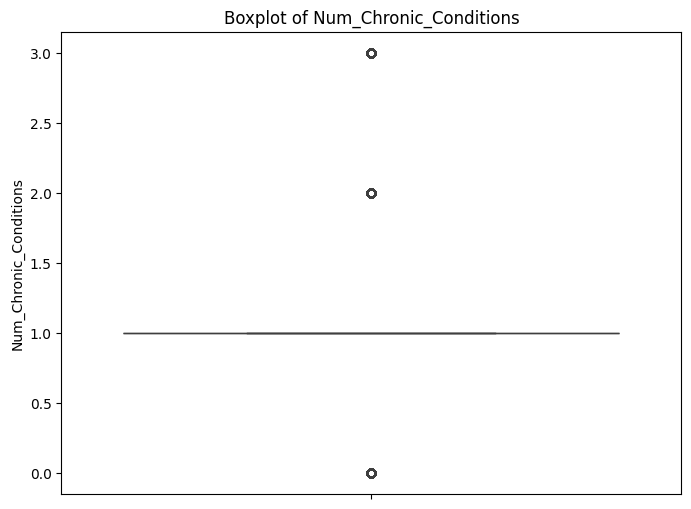

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Num_Chronic_Conditions'])
plt.title('Boxplot of Num_Chronic_Conditions')
plt.ylabel('Num_Chronic_Conditions')
plt.show()

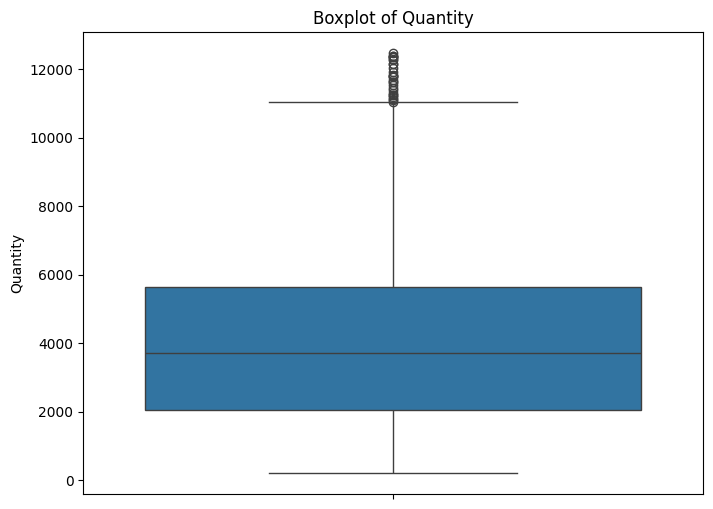

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Avg_Billing_Amount'])
plt.title('Boxplot of Avg_Billing_Amount')
plt.ylabel('Avg_Billing_Amount')
plt.show()

## **Eksplorasi Data (EDA)**

### **Comparisan / Perbadingan**

Aktivitas: Membandingkan kunjugan tahunan (Annual_Visits) dengan kondisi awal pasien (Primary_Condition).

Tujuan: Mengidentifikasi berapa banyak jumlah kunjungan tahunan pasien sesuai dengan penyakit yang diderita.

Visualisasi: Bar Chart (Grafik Batang).

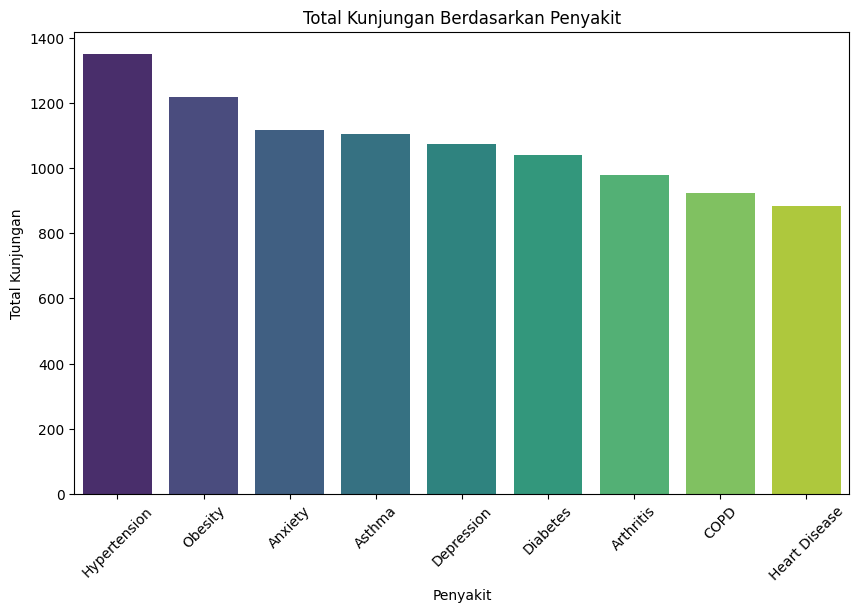

In [ ]:
penyakit = df.groupby('Primary_Condition')['Annual_Visits'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=penyakit.index, y=penyakit.values, palette='viridis', hue=penyakit.index, legend=False)
plt.title('Total Kunjungan Berdasarkan Penyakit')
plt.xlabel('Penyakit')
plt.ylabel('Total Kunjungan')
plt.xticks(rotation=45)
plt.show()

### **Compostion / Komposisi**

Aktivitas: Melihat proporsi atau persentase total kunjungna tahunan (Annual_Visits) berdasarkan usia pasien (Age).

Tujuan: Mengetahui usia mana yang mendominasi kunjungan dalam kunjungan tahunan mereka.

Visualisasi: Pie Chart (Grafik Lingkaran).

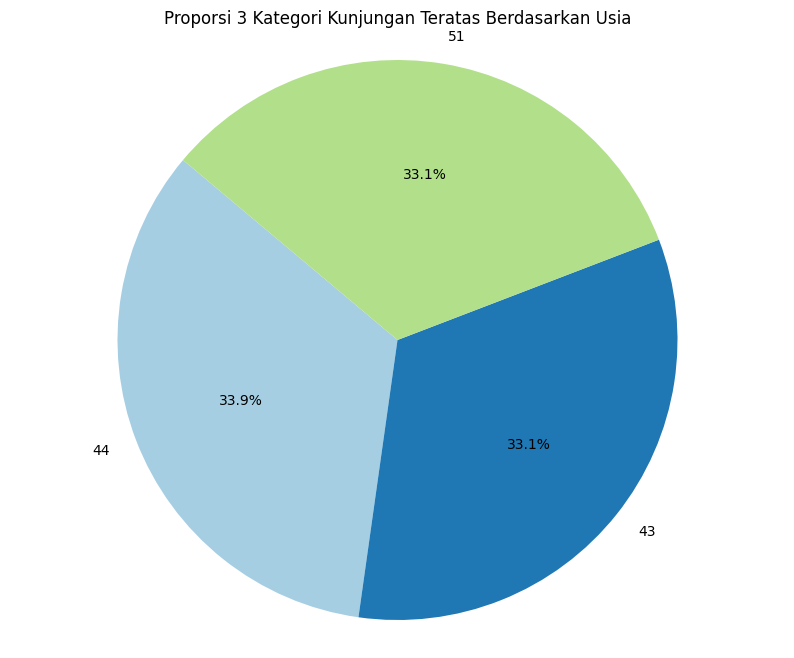

In [ ]:
visit_by_age = df.groupby('Age')['Annual_Visits'].sum().sort_values(ascending=False)
visit_by_age_top3 = visit_by_age.head(3)

plt.figure(figsize=(10, 8))
visit_by_age_top3.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi 3 Kategori Kunjungan Teratas Berdasarkan Usia')
plt.ylabel('')
plt.axis('equal')
plt.show()

### **Distribution / Distribusi**

Aktivitas: Menganalisis penyebaran nilai kunjungan pada kolom Annual_Visits.

Tujuan: Melihat apakah mayoritas kunjungna tahunan bernilai kecil atau besar, serta mendeteksi adanya kecondongan (skewness) dalam data kunjungan.

Visualisasi: Histogram.

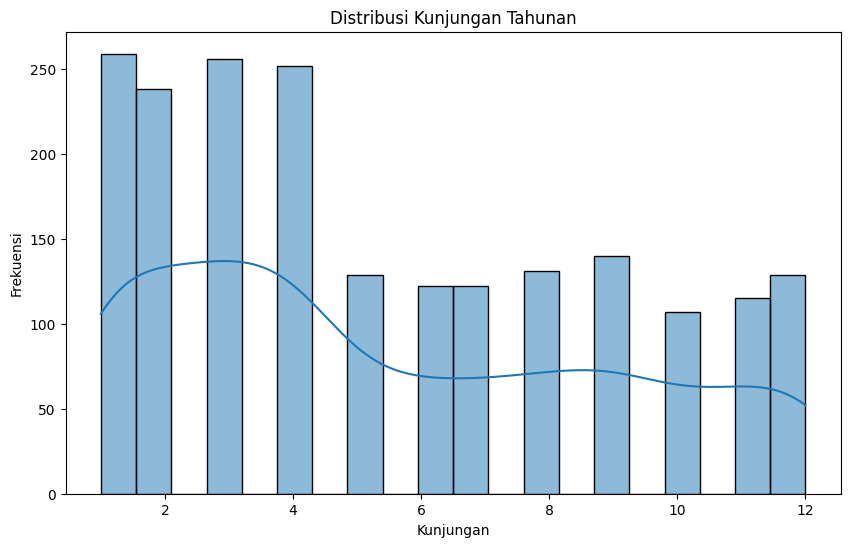

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Annual_Visits'], bins=20, kde=True)
plt.title('Distribusi Kunjungan Tahunan')
plt.xlabel('Kunjungan')
plt.ylabel('Frekuensi')
plt.show()

### **Relationship / Hubungan**

Aktivitas: Menganalisis korelasi antara kunjungan tahunan (Annual_Visits) dengan jumlah hari setelah kunjungan terakhir (Days_Since_Last_Visit).

Tujuan: Mengetahui apakah peningkatan kunjungan tahunan selalu berbanding lurus dengan rentang waktu kunjungan mereka dengan melihat jumlah hari setelah kunjungan terakhir pasien, serta mengidentifikasi kunjungan yang memiliki kunjungan dengan frekuensi tinggi (sering).

Visualisasi: Heatmap

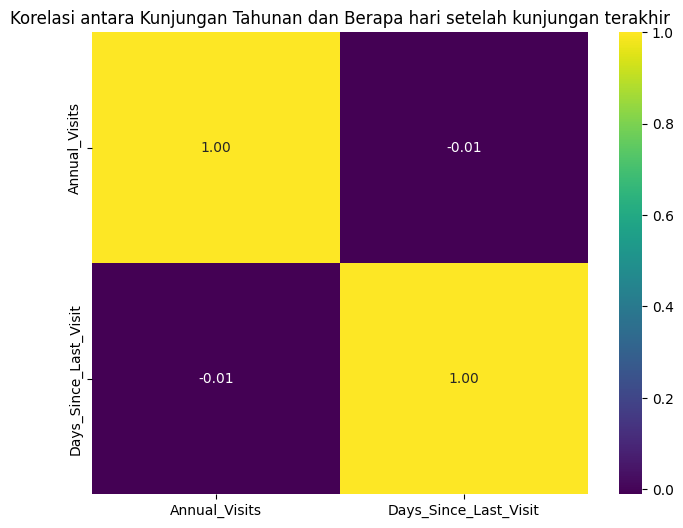

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['Annual_Visits', 'Days_Since_Last_Visit']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Korelasi antara Kunjungan Tahunan dan Berapa hari setelah kunjungan terakhir')
plt.show()

# **Menyimpan Dataset**

In [9]:
df.to_csv('Patient_Segmentation.csv', index=False)